In [3]:
import numpy as np
from decimal import *
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO
import csv
from numpy.fft import fft, ifft, fftfreq

C:\Users\thund\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


<AxesSubplot: xlabel='Timestamp[ms]'>

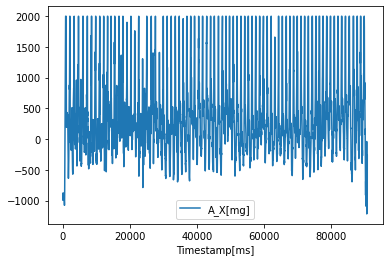

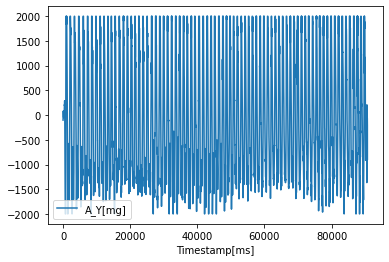

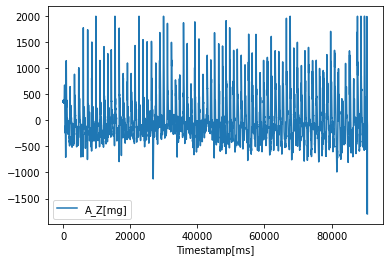

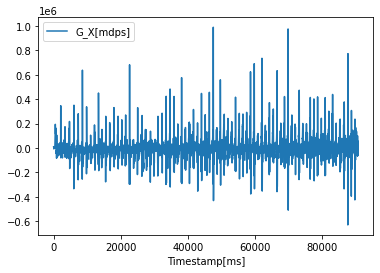

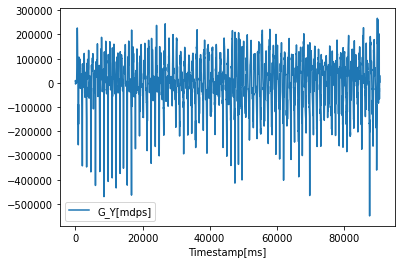

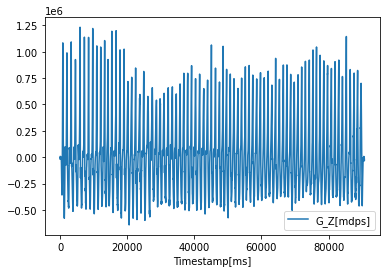

In [34]:
df = pd.read_csv("swingforward_topy.txt", sep=' ', header = 0)
df.plot(x = "Timestamp[ms]", y = "A_X[mg]")
df.plot(x = "Timestamp[ms]", y = "A_Y[mg]")
df.plot(x = "Timestamp[ms]", y = "A_Z[mg]")
df.plot(x = "Timestamp[ms]", y = "G_X[mdps]")
df.plot(x = "Timestamp[ms]", y = "G_Y[mdps]")
df.plot(x = "Timestamp[ms]", y = "G_Z[mdps]")

In [8]:
df

,Timestamp[ms],A_X[mg],A_Y[mg],A_Z[mg],G_X[mdps],G_Y[mdps],G_Z[mdps]
0,0,-858,-244,503,-1890,5040,3500
1,9,-841,-239,478,-3360,1820,6160
2,19,-842,-243,472,-5250,-210,6790
3,28,-851,-225,464,-6090,-910,6580
4,38,-846,-237,447,-6930,-560,6160
...,...,...,...,...,...,...,...
7492,72038,-734,202,699,-6650,3780,-13510
7493,72048,-734,183,688,-9520,2240,-12600
7494,72057,-731,146,683,-11830,1960,-10080
7495,72067,-736,121,676,-11690,3080,-7280


<AxesSubplot: xlabel='Timestamp[ms]'>

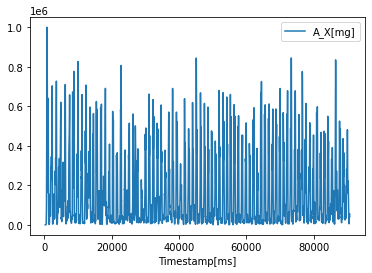

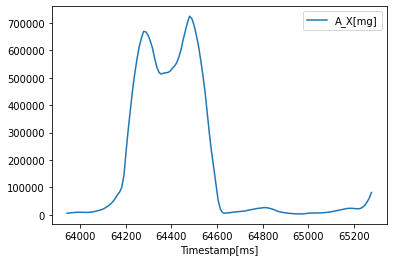

In [35]:
arith = df 
arith = df.rolling(30).var()
arith["Timestamp[ms]"] = df["Timestamp[ms]"]
arith.dropna()
arith.plot(x = "Timestamp[ms]", y = "A_X[mg]")
arith.iloc[6650:6790].plot(x = "Timestamp[ms]", y = "A_X[mg]")

In [36]:
zeroc = df
zerocross = lambda x: ((abs(np.sum(x)) != np.sum(abs(x))))|(np.all(x)==False)
zeroc = zeroc.rolling(2).apply(zerocross)
zeroc["Timestamp[ms]"] = df["Timestamp[ms]"]
zeroc

,Timestamp[ms],A_X[mg],A_Y[mg],A_Z[mg],G_X[mdps],G_Y[mdps],G_Z[mdps]
0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,9,0.0,0.0,0.0,0.0,0.0,0.0
2,19,0.0,0.0,0.0,0.0,0.0,0.0
3,28,0.0,0.0,0.0,0.0,0.0,0.0
4,38,0.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...
9427,90644,0.0,0.0,1.0,0.0,0.0,0.0
9428,90653,0.0,0.0,0.0,0.0,0.0,0.0
9429,90663,0.0,0.0,0.0,1.0,0.0,0.0
9430,90673,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot: xlabel='Timestamp[ms]'>

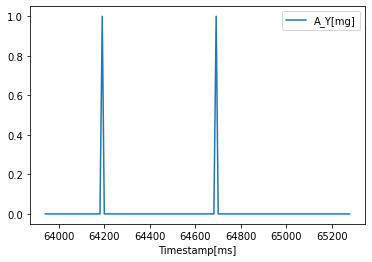

In [37]:
zeroc["Timestamp[ms]"] = df["Timestamp[ms]"]
zeroc.dropna()

zeroc.iloc[6650:6790].plot(x = "Timestamp[ms]", y = "A_Y[mg]")

In [50]:
scaler

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52])

In [38]:
fourier = df
scaler = np.arange(52) + 1
fourier = lambda x: abs(np.mean(np.multiply(fft(x),scaler)))
ft = df.rolling(52).apply(fourier)
ft["Timestamp[ms]"] = df["Timestamp[ms]"]

<AxesSubplot: xlabel='Timestamp[ms]'>

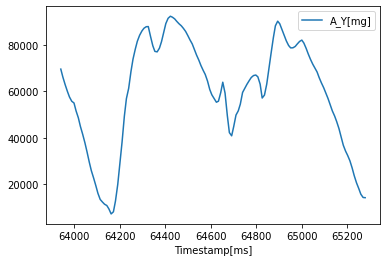

In [39]:
ft.iloc[6650:6790].plot(x = "Timestamp[ms]", y = "A_Y[mg]")

<AxesSubplot: xlabel='Timestamp[ms]'>

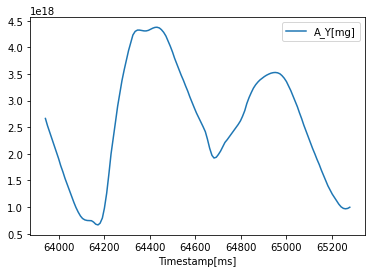

In [40]:
fourier = df
scaler = np.logspace(1,52,num = 52, base = 2)
scaler
fourier = lambda x: abs(np.mean(np.multiply(fft(x),scaler)))
ft = df.rolling(52).apply(fourier)
ft["Timestamp[ms]"] = df["Timestamp[ms]"]
ft.iloc[6650:6790].plot(x = "Timestamp[ms]", y = "A_Y[mg]")

In [41]:
fourier = df
fourier = lambda x: abs((fft(x)[4]))
ft = df.rolling(104).apply(fourier)
ft["Timestamp[ms]"] = df["Timestamp[ms]"]


In [42]:
ft.shape[0]

9432

In [43]:

a = ft.shape[0]
arr = []
for i in np.arange(a):
    if (ft["A_Y[mg]"].iloc[i]) > 11000:
        arr.append(i)
arr


[103,
 104,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 238,
 239,
 240,
 241,
 242,
 243,
 244,
 245,
 246,
 247,
 248,
 249,
 250,
 251,
 252,
 253,
 254,
 255,
 256,
 280,
 281,
 282,
 283,
 284,
 285,
 286,
 287,
 288,
 289,
 290,
 291,
 292,
 293,
 294,
 295,
 296,
 297,
 298,
 299,
 300,
 301,
 302,
 303,
 304,
 305,
 306,
 307,
 308,
 309,
 310,
 311,
 312,
 313,
 314,
 315,
 316,
 317,
 318,
 319,
 320,
 327,
 328,
 329,
 330,
 331,
 332,
 333,
 334,
 335,
 336,
 337,
 338,
 339,
 340,
 341,
 342,
 343,
 344,
 345,
 346,
 347

<AxesSubplot: xlabel='Timestamp[ms]'>

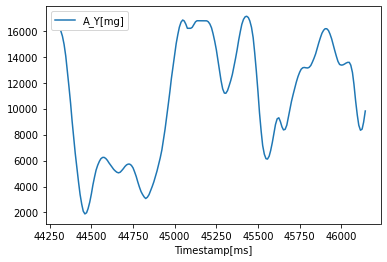

In [44]:
ft.iloc[4609:4800].plot(x = "Timestamp[ms]", y = "A_Y[mg]")

In [23]:
"""x = np.logspace(1,53,num = 53, base = 2)
h = len(x)
av = 0
for i in np.arange(10):
    av += df["Timestamp[ms]"].iloc[i+1] - df["Timestamp[ms]"].iloc[i] 
freq = 1000*10//av
N = freq//3 
t = freq/34
ft = fft(zeroc.iloc[6650:6690])
fq = fftfreq(104,1/104)
g = (t2-t1) + (t3-t2) + (t4-t3)
[t1,t2,t3,t4, 1000*10//av, N, t]
"""

'x = np.logspace(1,53,num = 53, base = 2)\nh = len(x)\nav = 0\nfor i in np.arange(10):\n    av += df["Timestamp[ms]"].iloc[i+1] - df["Timestamp[ms]"].iloc[i] \nfreq = 1000*10//av\nN = freq//3 \nt = freq/34\nft = fft(zeroc.iloc[6650:6690])\nfq = fftfreq(104,1/104)\ng = (t2-t1) + (t3-t2) + (t4-t3)\n[t1,t2,t3,t4, 1000*10//av, N, t]\n'

In [45]:
fq= fftfreq(104,1/104)
ft = fft(zeroc.iloc[6650:6690])[4]
ft[4]
fq[4]

4.0

<AxesSubplot: xlabel='Timestamp[ms]'>

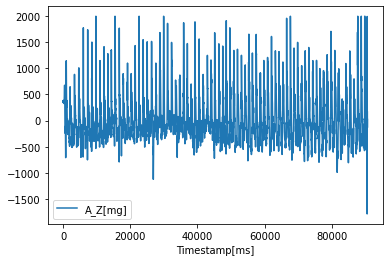

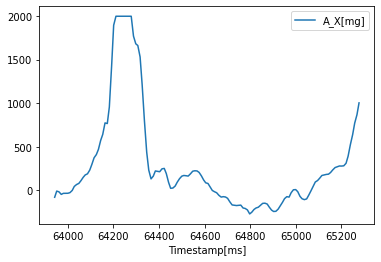

In [46]:
dropped = df.drop(df.tail(10).index)
dropped.plot(x = "Timestamp[ms]", y = "A_Z[mg]")
dropped.iloc[6650:6790].plot(x = "Timestamp[ms]", y = "A_X[mg]")

Text(0.5, 0, 'Freq (Hz)')

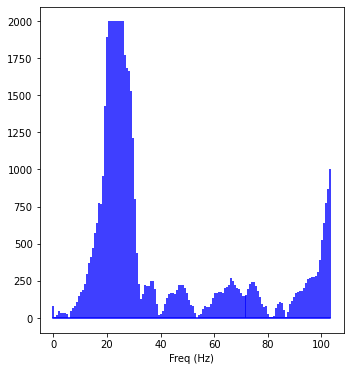

In [47]:
anax = dropped.iloc[6650:6790, [1]].to_numpy()
ts = 1.0/104
t = np.arange(0,1,ts)
X = fft(anax)
N = len(X)
n = np.arange(N)
X
T = N/104
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')




In [27]:
#trim = dropped.drop(df.head(100).index)
trim = dropped
trim.reset_index(inplace = True, drop = True)
trim.columns =  ['Timestamp[ms]', 'A_X [mg]' ,'A_Y [mg]','A_Z [mg]',
            'G_X [mdps]','G_Y [mdps]', 'G_Z [mdps]']
trim

,Timestamp[ms],A_X [mg],A_Y [mg],A_Z [mg],G_X [mdps],G_Y [mdps],G_Z [mdps]
0,0,-830,181,475,-980,1540,7910
1,9,-846,147,477,910,2380,13160
2,19,-855,121,471,4060,1890,14210
3,28,-874,149,458,9100,1540,10710
4,38,-871,177,451,11270,1120,4130
...,...,...,...,...,...,...,...
8039,77298,-683,331,635,1050,-3010,-1680
8040,77307,-682,337,631,1260,-3710,-1260
8041,77317,-677,341,633,630,-3920,-280
8042,77326,-674,339,641,-280,-3570,910


In [48]:
trim.reset_index()
trim.to_csv('swingforward_train.txt', sep = ' ', index = False)
nod_r = open('swingforward.txt', 'r')

x = nod_r.readlines()
x[0] = x[0].replace('"', '')
nod_w = open('bob_train.txt', 'w')
nod_w.writelines(x)

!!Next

<AxesSubplot: xlabel='Timestamp[ms]'>

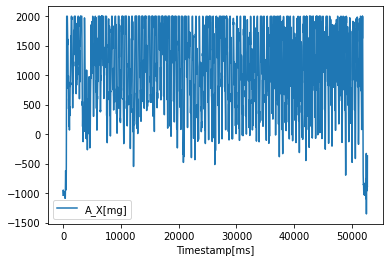

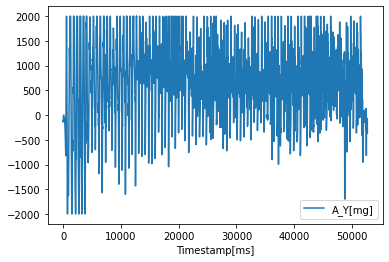

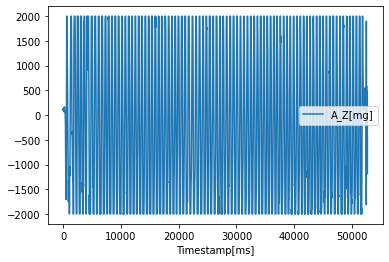

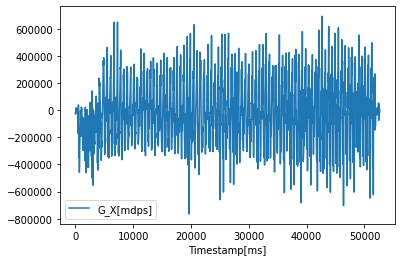

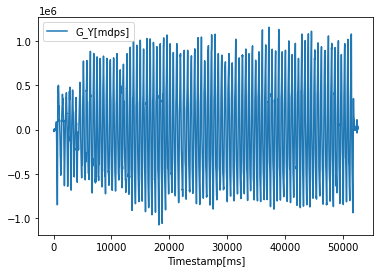

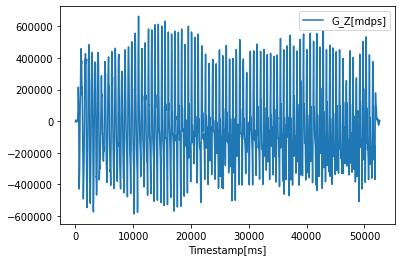

In [68]:
df = pd.read_csv("swingside_topy.txt", sep=' ', header = 0)
df.plot(x = "Timestamp[ms]", y = "A_X[mg]")
df.plot(x = "Timestamp[ms]", y = "A_Y[mg]")
df.plot(x = "Timestamp[ms]", y = "A_Z[mg]")
df.plot(x = "Timestamp[ms]", y = "G_X[mdps]")
df.plot(x = "Timestamp[ms]", y = "G_Y[mdps]")
df.plot(x = "Timestamp[ms]", y = "G_Z[mdps]")


<AxesSubplot: xlabel='Timestamp[ms]'>

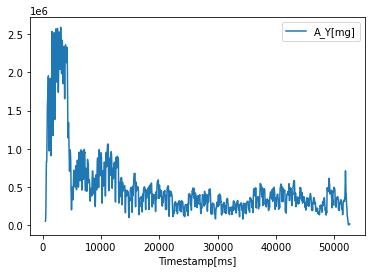

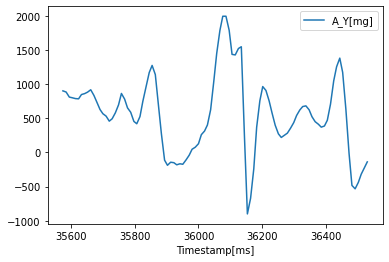

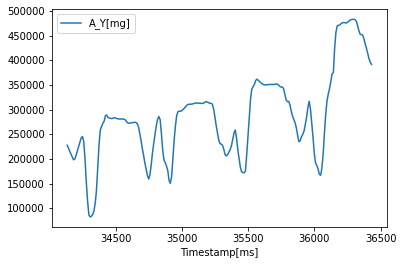

In [69]:
arith = df 
arith = df.rolling(50).var()
arith["Timestamp[ms]"] = df["Timestamp[ms]"]
arith.dropna()
arith.plot(x = "Timestamp[ms]", y = "A_Y[mg]")
df.iloc[3700:3800].plot(x = "Timestamp[ms]", y = "A_Y[mg]")
arith.iloc[3550:3790].plot(x = "Timestamp[ms]", y = "A_Y[mg]")

<AxesSubplot: xlabel='Timestamp[ms]'>

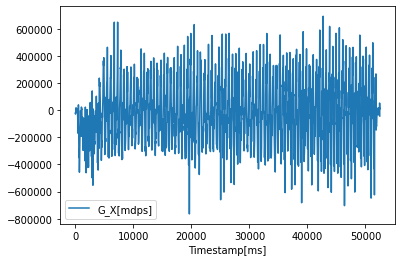

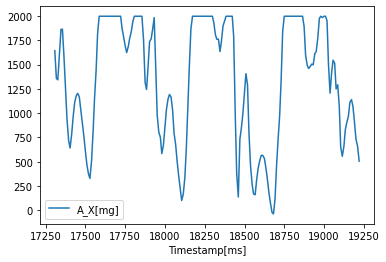

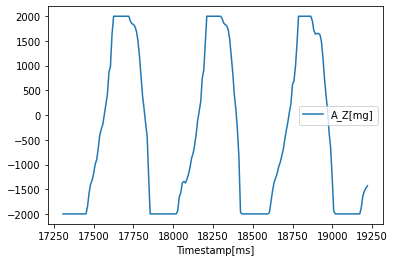

In [70]:
dropped = df.drop(df.tail(20).index)
dropped.plot(x = "Timestamp[ms]", y = "G_X[mdps]")
dropped.iloc[1800:2000].plot(x = "Timestamp[ms]", y = "A_X[mg]")
dropped.iloc[1800:2000].plot(x = "Timestamp[ms]", y = "A_Z[mg]")

In [71]:
#trim = dropped.drop(df.head(100).index)
trim = dropped
trim.reset_index(inplace = True, drop = True)
trim.columns =  ['Timestamp[ms]', 'A_X [mg]' ,'A_Y [mg]','A_Z [mg]',
            'G_X [mdps]','G_Y [mdps]', 'G_Z [mdps]']
trim

,Timestamp[ms],A_X [mg],A_Y [mg],A_Z [mg],G_X [mdps],G_Y [mdps],G_Z [mdps]
0,0,-1037,-123,106,-22190,-18620,-3990
1,9,-1013,-139,124,-28490,-21070,-1400
2,19,-986,-141,133,-28980,-20160,1050
3,28,-959,-129,137,-25480,-17080,3430
4,38,-949,-117,134,-19670,-12110,5670
...,...,...,...,...,...,...,...
5453,52432,-826,134,153,13090,20510,-21420
5454,52442,-1097,-35,525,52290,52710,-17990
5455,52451,-938,-92,434,35560,30940,-23030
5456,52461,-870,54,385,-20930,-1750,-25270


In [72]:
wfile = "swingside_train.txt"
trim.reset_index()
trim.to_csv(wfile, sep = ' ', index = False)
nod_r = open(wfile, 'r')

x = nod_r.readlines()
x[0] = x[0].replace('"', '')
nod_w = open(wfile, 'w')
nod_w.writelines(x)

<AxesSubplot: xlabel='Timestamp[ms]'>

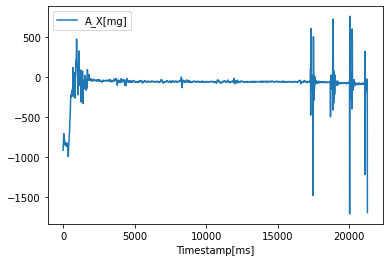

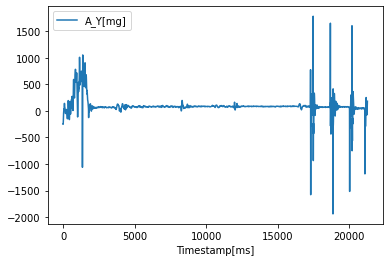

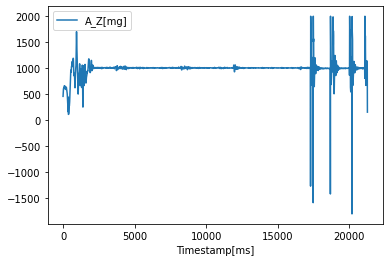

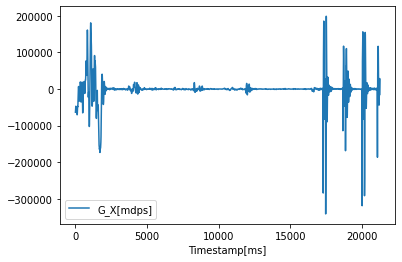

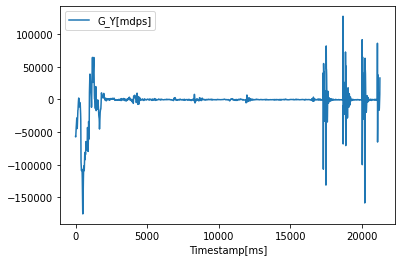

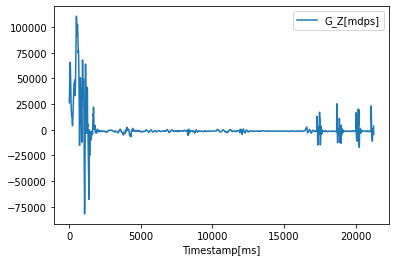

In [4]:
df = pd.read_csv("idle2_topy.txt", sep=' ', header = 0)
df.plot(x = "Timestamp[ms]", y = "A_X[mg]")
df.plot(x = "Timestamp[ms]", y = "A_Y[mg]")
df.plot(x = "Timestamp[ms]", y = "A_Z[mg]")
df.plot(x = "Timestamp[ms]", y = "G_X[mdps]")
df.plot(x = "Timestamp[ms]", y = "G_Y[mdps]")
df.plot(x = "Timestamp[ms]", y = "G_Z[mdps]")

In [7]:
len(df)

2212

<AxesSubplot: xlabel='Timestamp[ms]'>

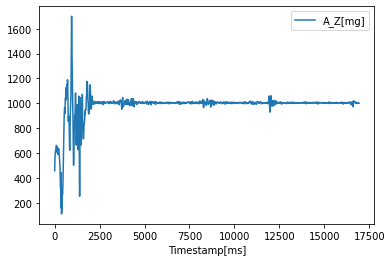

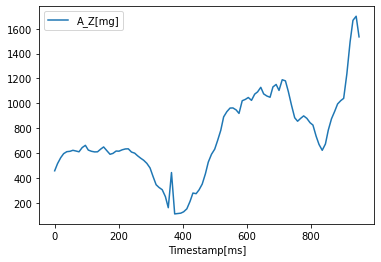

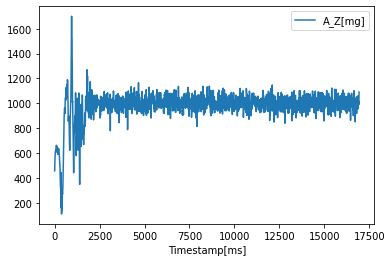

In [24]:
dropped = df.drop(df.tail(450).index)
dropped.plot(x = "Timestamp[ms]", y = "A_Z[mg]")
trim = dropped
dropped.head(100).plot(x = "Timestamp[ms]", y = "A_Z[mg]")
gaus = np.random.normal(0,50,len(dropped))
for i in range(100):
    gaus[i] = 0
dropped = dropped.add(gaus, axis = 0)
dropped["Timestamp[ms]"] = df["Timestamp[ms]"]
dropped.plot(x = "Timestamp[ms]", y = "A_Z[mg]")

In [25]:
trim.reset_index(inplace = True, drop = True)
trim.columns =  ['Timestamp[ms]', 'A_X [mg]' ,'A_Y [mg]','A_Z [mg]',
            'G_X [mdps]','G_Y [mdps]', 'G_Z [mdps]']
wfile = "idlegaus.txt"
trim.reset_index()
trim.to_csv(wfile, sep = ' ', index = False)
nod_r = open(wfile, 'r')

x = nod_r.readlines()
x[0] = x[0].replace('"', '')
nod_w = open(wfile, 'w')
nod_w.writelines(x)

<AxesSubplot: xlabel='Timestamp[ms]'>

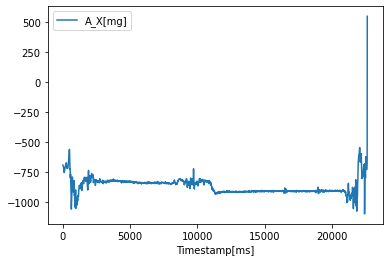

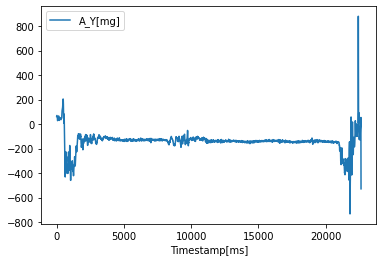

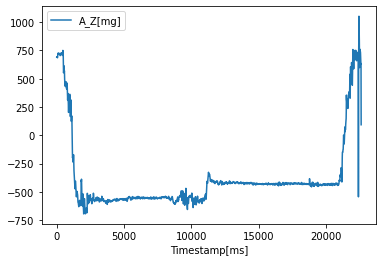

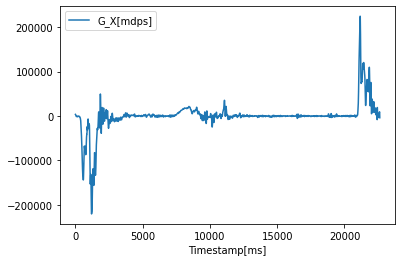

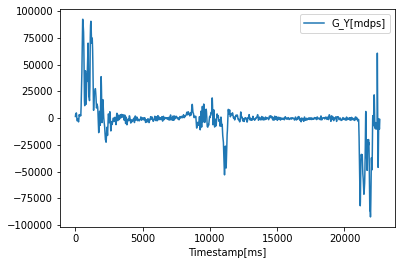

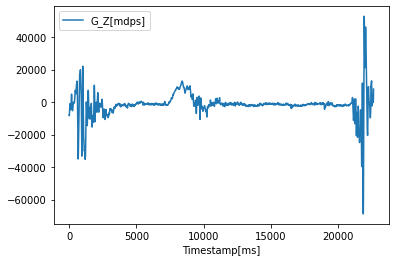

In [65]:
 df = pd.read_csv("idle_sit_topy.txt", sep=' ', header = 0)
df.plot(x = "Timestamp[ms]", y = "A_X[mg]")
df.plot(x = "Timestamp[ms]", y = "A_Y[mg]")
df.plot(x = "Timestamp[ms]", y = "A_Z[mg]")
df.plot(x = "Timestamp[ms]", y = "G_X[mdps]")
df.plot(x = "Timestamp[ms]", y = "G_Y[mdps]")
df.plot(x = "Timestamp[ms]", y = "G_Z[mdps]")

<AxesSubplot: xlabel='Timestamp[ms]'>

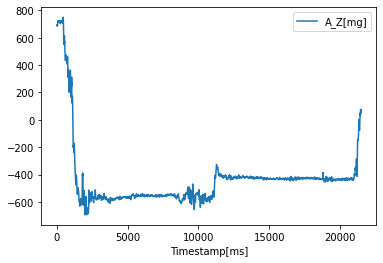

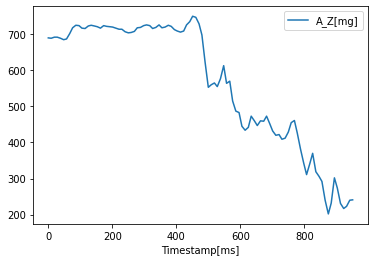

In [66]:
dropped = df.drop(df.tail(120).index)
dropped.plot(x = "Timestamp[ms]", y = "A_Z[mg]")
trim = dropped
dropped.head(100).plot(x = "Timestamp[ms]", y = "A_Z[mg]")

In [399]:
trim.reset_index(inplace = True, drop = True)
trim.columns =  ['Timestamp[ms]', 'A_X [mg]' ,'A_Y [mg]','A_Z [mg]',
            'G_X [mdps]','G_Y [mdps]', 'G_Z [mdps]']
wfile = "sitidle.txt"
trim.reset_index()
trim.to_csv(wfile, sep = ' ', index = False)
nod_r = open(wfile, 'r')

x = nod_r.readlines()
x[0] = x[0].replace('"', '')
nod_w = open(wfile, 'w')
nod_w.writelines(x)

WIndow 150 
variance all
xy energy A
zy energy G
peak to peak all
Y zero corssing A (walk)
maximum unsigned all 